<a href="https://colab.research.google.com/github/HinePo/Image_to_Sketch/blob/main/Image_to_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image to sketch

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imageio
import scipy.ndimage

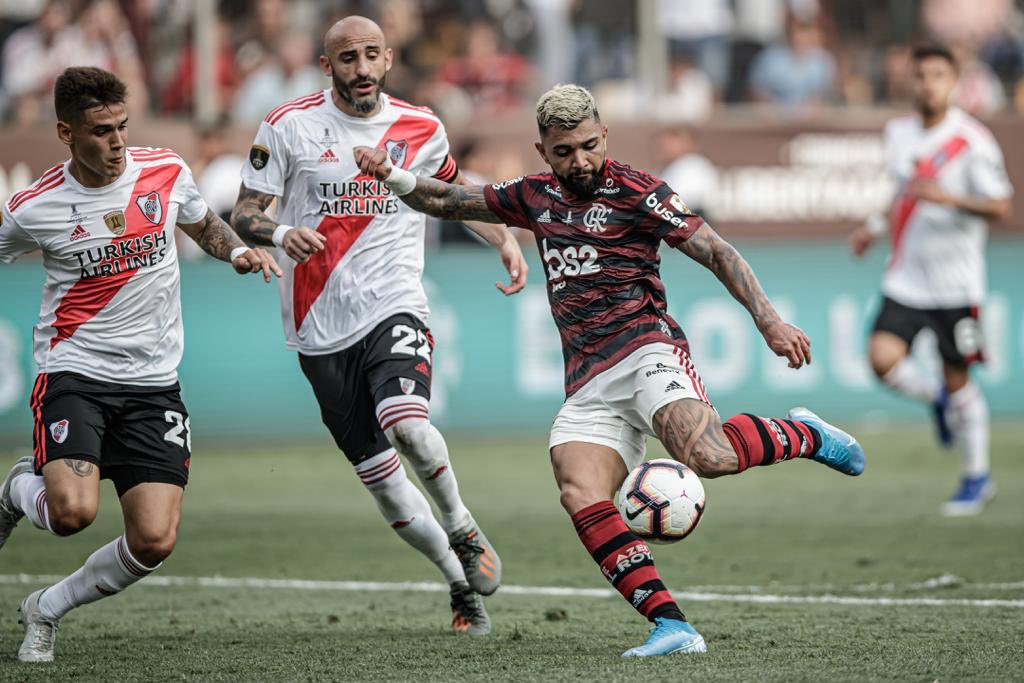

In [2]:
# image path
img_path = '/content/gabigol-x-river-plate.jpg'

img = cv2.imread(img_path) # load image
cv2_imshow(img) # show

## Processing functions

In [3]:
def grayscale(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def dodge(front, back):
  result = front * 255 / (255 - back)
  result[result>255] = 255
  result[back==255] = 255
  return result.astype('uint8')

In [4]:
s = imageio.imread(img_path)

g = grayscale(s)

i = 255 - g

In [5]:
b = scipy.ndimage.filters.gaussian_filter(i, sigma = 10)
r = dodge(b, g)

In [6]:
print('Img shape: ', img.shape)
print('s shape: ', s.shape)
print('b shape: ', b.shape)
print('r shape: ', r.shape)

Img shape:  (683, 1024, 3)
s shape:  (683, 1024, 3)
b shape:  (683, 1024)
r shape:  (683, 1024)


# Results

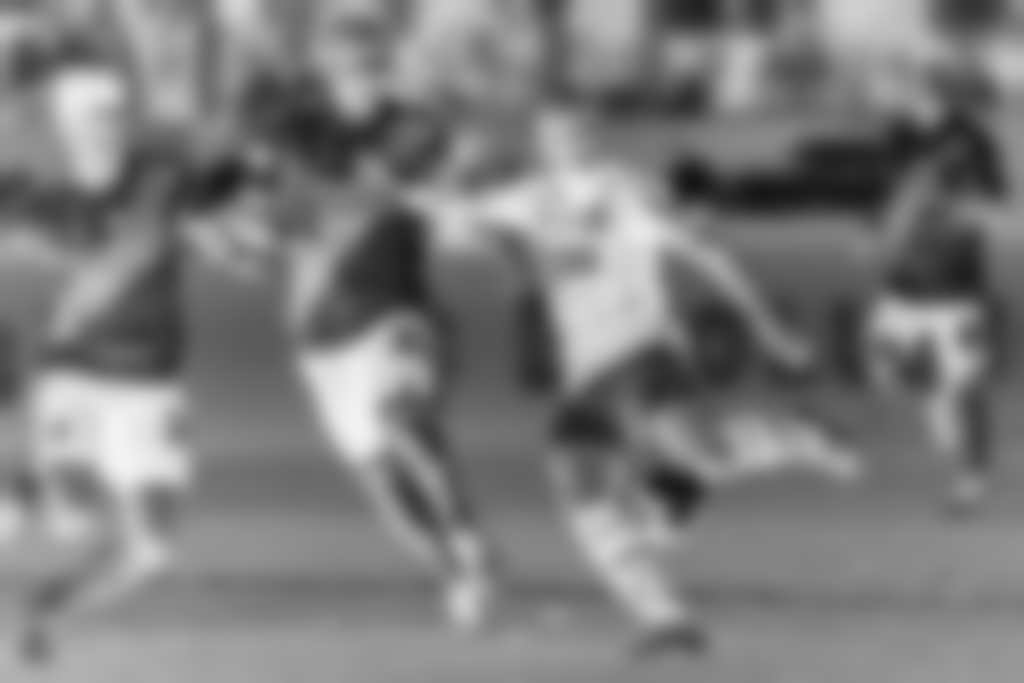

In [7]:
cv2_imshow(b) # show

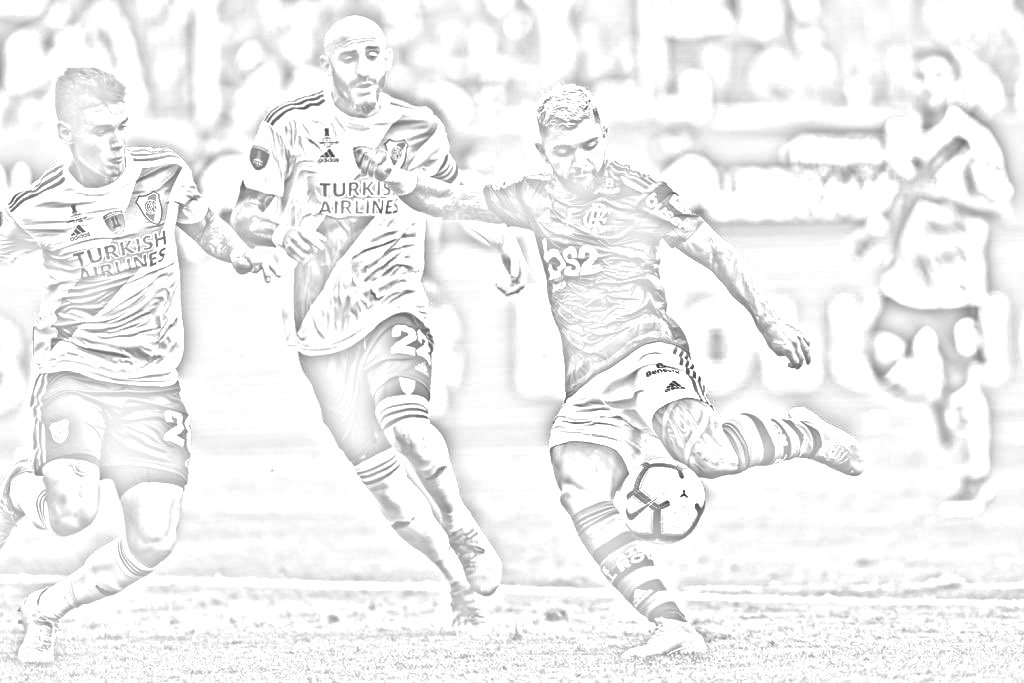

In [8]:
cv2_imshow(r) # show

# Save

In [9]:
# save on working directory
cv2.imwrite('sketch.png', r)

True

In [10]:
# cv2.imread('/content/sketch.png')
# cv2_imshow(cv2.imread('/content/sketch.png'))